# Sales Data Analysis Project
## Exploring 2019 Product Sales Trends

## Introduction
This project analyzes a year's worth of sales data (2019) to uncover valuable business insights. By examining sales patterns, product relationships, and temporal trends, we aim to help businesses optimize their operations, marketing strategies, and product offerings.

## Background
The dataset contains:
- 12 months of sales records (January-December 2019)
- Over 186,000 individual transactions
- Key information including:
  - Order dates/times
  - Products purchased
  - Quantities
  - Prices
  - Purchase locations

This analysis helps answer critical business questions:
- When to run marketing campaigns
- Which products to bundle
- Where to focus sales efforts
- How sales fluctuate throughout the year

## Tools I Used
**Data Processing & Analysis:**
- `Pandas` - For data manipulation and cleaning
- `NumPy` - For numerical operations

**Visualization:**
- `Matplotlib` - For creating static visualizations
- `Seaborn` - For enhanced statistical graphics

**Specialized Analysis:**
- `Collections.Counter` - For counting product combinations
- `itertools.combinations` - For identifying frequently co-purchased items

**Data Formatting:**
- `Babel` - For currency/number formatting

**Workflow:**
- Jupyter Notebook - For interactive analysis and documentation

In [1]:
import pandas as pd, numpy as np, babel as bl, scipy as sp, seaborn as sns, matplotlib.pyplot as plt, math as m, os
from babel import numbers
from scipy import stats

## Data Loading and Preparation

In [2]:
# Load monthly sales data
base_dir = '/Users/brtelfer/Documents/Python_Data_Projects/*15_Sales_Data'
file_names = [
    'Sales_January_2019.csv', 'Sales_February_2019.csv', 'Sales_March_2019.csv',
    'Sales_April_2019.csv', 'Sales_May_2019.csv', 'Sales_June_2019.csv',
    'Sales_July_2019.csv', 'Sales_August_2019.csv', 'Sales_September_2019.csv',
    'Sales_October_2019.csv', 'Sales_November_2019.csv', 'Sales_December_2019.csv']

# Create individual DataFrames for each month
for file_name in file_names:
    month = file_name.split('_')[1].lower()
    df = pd.read_csv(os.path.join(base_dir, file_name))
    globals()[f'df_{month[:3]}'] = df
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [3]:
# Combine all monthly data
frames = [df_jan,df_feb,df_mar,df_apr,df_may,df_jun,df_jul,df_aug,df_nov,df_dec,df_oct,df_sep]
full_df = pd.concat(frames)
full_df_c = full_df.dropna()

# Clean data
full_df_c = full_df_c[full_df_c['Order Date'].str.contains('Order Date')==False]

# Extract month from order date
full_df_c['Month'] = full_df_c['Order Date'].str.split('/').str.get(0).astype(int)

# Convert data types
full_df_c['Quantity Ordered'] = full_df_c['Quantity Ordered'].astype(int)
full_df_c['Price Each'] = full_df_c['Price Each'].astype(float)

# Calculate sales amount
full_df_c['Sales'] = full_df_c['Price Each'] * full_df_c['Quantity Ordered']

## Monthly Sales Analysis

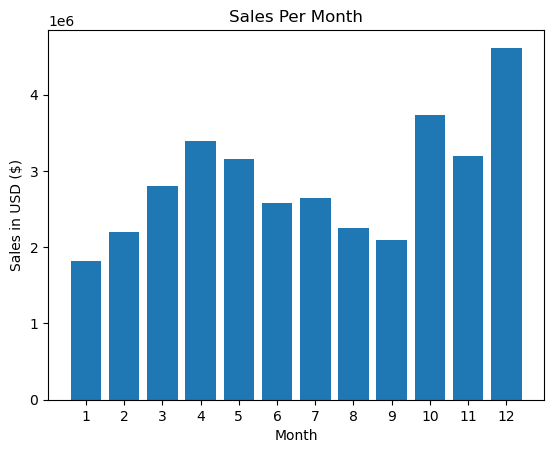

In [4]:
# Aggregate sales by month
results = full_df_c.groupby('Month').sum()

# Visualize monthly sales
months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.title('Sales Per Month')
plt.xlabel('Month')
plt.ylabel('Sales in USD ($)')
plt.show()

## Geographic Sales Analysis

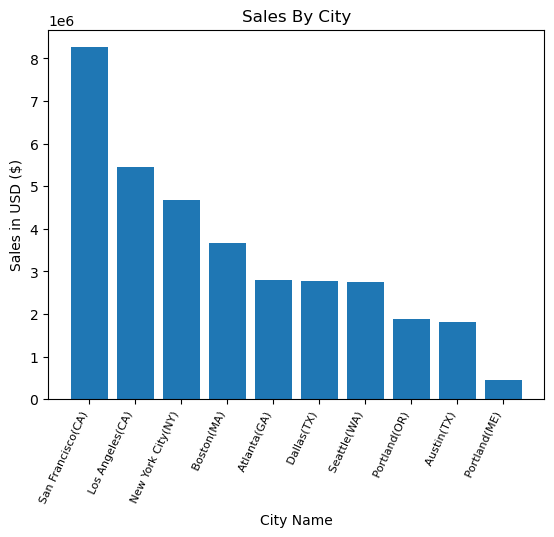

In [5]:
# Extract city-state information
full_df_c['City_&_State'] = full_df_c['Purchase Address'].str.split(',').str.get(1) + \
                          '(' + full_df_c['Purchase Address'].str.split(',').str.get(2).map(lambda x: x.strip('1234567890 ')) + ')'

# Analyze sales by city
results = full_df_c.groupby('City_&_State').sum()['Sales'].sort_values(ascending = False)

# Visualize city sales
cities = results.keys()
plt.bar(cities, results)
plt.xticks(cities, rotation = 65, size=8, ha='right')
plt.title('Sales By City')
plt.xlabel('City Name')
plt.ylabel('Sales in USD ($)')
plt.show()

## Temporal Purchase Patterns

/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_44818/3973488688.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  full_df_c['Order Date'] = pd.to_datetime(full_df_c['Order Date'])


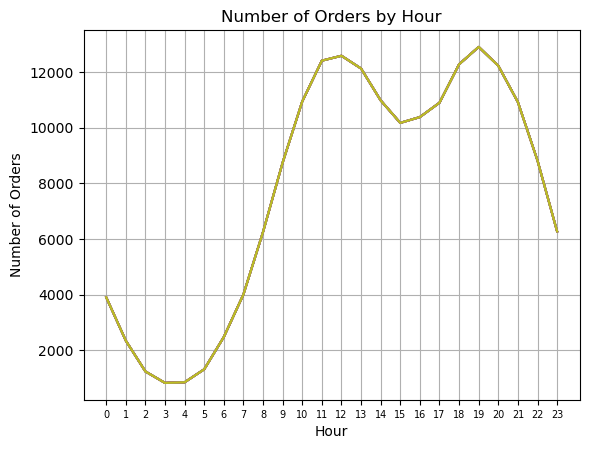

In [6]:
# Extract order hour
full_df_c['Order Date'] = pd.to_datetime(full_df_c['Order Date'])
full_df_c['Hour'] = full_df_c['Order Date'].dt.hour

# Analyze order frequency by hour
hours = [hour for hour, df in full_df_c.groupby('Hour')]
plt.plot(hours, full_df_c.groupby('Hour').count())
plt.xticks(hours, size=7)
plt.grid()
plt.title('Number of Orders by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

/var/folders/_q/6b8w1jdj7r90hq2bqrt7k8fw0000gn/T/ipykernel_44818/3989220411.py:6: DeprecationWarning: Use babel.numbers.format_decimal() instead.
  mean_list = [bl.numbers.format_number(x, locale='en_US') for x in mean_list]


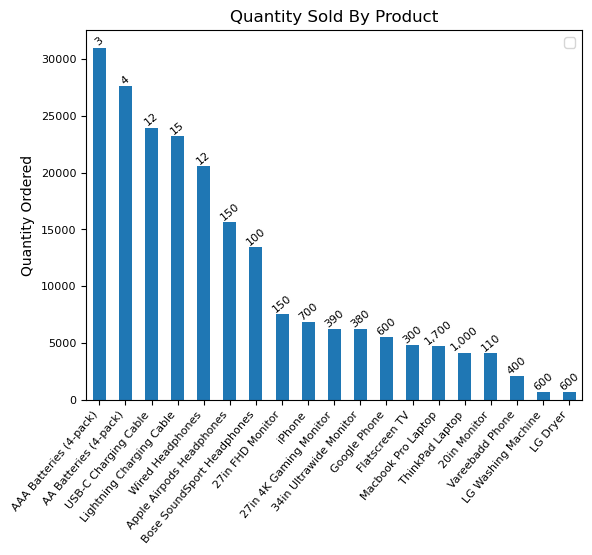

In [7]:
# Analyze product sales quantities
product_stats = full_df_c[['Quantity Ordered','Product','Price Each']].groupby('Product').agg({'Quantity Ordered':'sum','Price Each':'mean'}).sort_values('Quantity Ordered', ascending=False)

# Format prices
mean_list = [round(x) for x in product_stats['Price Each']]
mean_list = [bl.numbers.format_number(x, locale='en_US') for x in mean_list]

# Visualize product sales
quantity_ordered = product_stats['Quantity Ordered']
ax = quantity_ordered.plot.bar()
plt.title('Quantity Sold By Product')
plt.xticks(rotation=50, ha='right', size=8)
plt.xlabel('')
plt.ylabel('Quantity Ordered')
plt.yticks(size=8)
plt.legend('')

# Add price annotations
for i, value in enumerate(mean_list):
    ax.text(i, quantity_ordered.iloc[i], value, ha='center', va='bottom', size=8, rotation=40)
plt.show()

In [8]:
print(full_df_c.head())

  Order ID                   Product  Quantity Ordered  Price Each  \
0   141234                    iPhone                 1      700.00   
1   141235  Lightning Charging Cable                 1       14.95   
2   141236          Wired Headphones                 2       11.99   
3   141237          27in FHD Monitor                 1      149.99   
4   141238          Wired Headphones                 1       11.99   

           Order Date                       Purchase Address  Month   Sales  \
0 2019-01-22 21:25:00        944 Walnut St, Boston, MA 02215      1  700.00   
1 2019-01-28 14:15:00       185 Maple St, Portland, OR 97035      1   14.95   
2 2019-01-17 13:33:00  538 Adams St, San Francisco, CA 94016      1   23.98   
3 2019-01-05 20:33:00     738 10th St, Los Angeles, CA 90001      1  149.99   
4 2019-01-25 11:59:00          387 10th St, Austin, TX 73301      1   11.99   

         City_&_State  Hour  
0          Boston(MA)    21  
1        Portland(OR)    14  
2   San Franci

## Product Analysis

In [9]:
# Identify frequently co-purchased products
full_df_c = full_df_c[full_df_c['Order ID'].duplicated(keep=False)].sort_values('Order ID')
full_df_c['Grouped'] = full_df_c.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
full_df_c = full_df_c[['Order ID', 'Grouped']].drop_duplicates()

from itertools import combinations
from collections import Counter
count = Counter()
for row in full_df_c['Grouped']:
    row_list = sorted(row.split(','))
    count.update(Counter(combinations(row_list, 2)))

print("Top Product Combinations:")
for key, value in count.most_common(20):
    print(key, value)

Top Product Combinations:
('Lightning Charging Cable', 'iPhone') 1015
('Google Phone', 'USB-C Charging Cable') 999
('Wired Headphones', 'iPhone') 462
('Google Phone', 'Wired Headphones') 423
('Apple Airpods Headphones', 'iPhone') 373
('USB-C Charging Cable', 'Vareebadd Phone') 368
('Bose SoundSport Headphones', 'Google Phone') 228
('USB-C Charging Cable', 'Wired Headphones') 205
('Vareebadd Phone', 'Wired Headphones') 149
('Lightning Charging Cable', 'Wired Headphones') 129
('Apple Airpods Headphones', 'Lightning Charging Cable') 116
('AA Batteries (4-pack)', 'Lightning Charging Cable') 106
('Bose SoundSport Headphones', 'USB-C Charging Cable') 102
('Apple Airpods Headphones', 'Wired Headphones') 100
('Lightning Charging Cable', 'USB-C Charging Cable') 100
('AAA Batteries (4-pack)', 'USB-C Charging Cable') 95
('AA Batteries (4-pack)', 'AAA Batteries (4-pack)') 87
('AAA Batteries (4-pack)', 'Wired Headphones') 86
('AA Batteries (4-pack)', 'Wired Headphones') 83
('Bose SoundSport Headpho

## Key Findings
1. **Monthly Trends**: Sales peak in December (holiday season) and dip in January
2. **Geographic Patterns**: San Francisco (CA) generates the highest sales volume
3. **Optimal Ad Times**: 11AM-1PM and 7PM are peak ordering hours
4. **Product Insights**:
   - AAA batteries are the top-selling individual item
   - iPhones and Lightning Charging Cables are frequently purchased together
   - Lower-priced items generally sell in higher quantities

## Business Recommendations
1. **Marketing Timing**:
   - Run promotions before peak buying hours (late morning and early evening)
   - Increase ad spend in Q4 to capitalize on holiday shopping

2. **Product Strategy**:
   - Create bundles for frequently co-purchased items
   - Highlight complementary products during checkout

3. **Geographic Focus**:
   - Allocate more inventory to high-performing cities
   - Investigate why some cities underperform others

4. **Pricing Analysis**:
   - Review pricing strategy for low-volume, high-price items
   - Consider volume discounts for high-selling basic items